<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;"><img src=imagens/brasil-brasao.png alt="" /></td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Rep&uacute;blica Federativa do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img src="imagens/UFAM-logo.png" alt="" /></td>

</tr>
</tbody>
</table>

# Aprendizado de Máquina e Mineração de Dados
## Lista Prática de Análise de Dados

Professores _Marco Cristo_ e _Eulanda Santos_

**Aluno**: Thiago Moraes 

__Introdução__: Neste trabalho, vamos analisar dados do INEP sobre o ENADE 2014. Estes dados estão organizados em duas releções: (1) as informações do candidato necessárias para realizar a prova, além das suas notas; e (2) respostas que os candidatos deram a questionários sobre a prova, seus dados pessoais e curso realizado. Em anexo, ao fim deste notebook, temos uma descrição detalhada das informações obtidas. 

#### Preliminares

In [0]:
#!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
#!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
#!apt-get update -qq 2>&1 > /dev/null
#!apt-get -y install -qq google-drive-ocamlfuse fuse
#from google.colab import auth
#auth.authenticate_user()
#from oauth2client.client import GoogleCredentials
#creds = GoogleCredentials.get_application_default()
#import getpass
#!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
#vcode = getpass.getpass()
#!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
#!mkdir -p drive
#!google-drive-ocamlfuse drive

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#egeral = pd.read_csv('drive/lp-alunos/enade2014geral.csv')
#equest = pd.read_csv('drive/lp-alunos/enade2014questionario.csv')
egeral = pd.read_csv('enade2014geral.csv')
equest = pd.read_csv('enade2014questionario.csv')

#### Análise de valores faltantes

<div class="alert alert-info">
<b>1</b> - Que colunas possuem campos nulos em **egeral** e **equest**?
</div>

In [5]:
#em egeral nao aparece nenhum
egeral[:].isnull().sum()

pass

In [6]:
#todas as colunas com questionario
equest[:].isnull().sum()

    

CO_RS_I1     0
CO_RS_I2     0
CO_RS_I3     0
CO_RS_I4     0
CO_RS_I5     0
CO_RS_I6     0
CO_RS_I7     0
CO_RS_I8     0
CO_RS_I9     0
QE_I01      12
QE_I02      12
QE_I03      12
QE_I04      12
QE_I05      12
QE_I06      12
QE_I07      12
QE_I08      12
QE_I09      12
QE_I10      12
QE_I11      12
QE_I12      12
QE_I13      13
QE_I14      13
QE_I15      13
QE_I17      13
QE_I18      13
QE_I19      13
QE_I20      13
QE_I21      13
QE_I22      13
            ..
QE_I39      13
QE_I40      13
QE_I41      13
QE_I42      13
QE_I43      13
QE_I44      13
QE_I45      13
QE_I46      13
QE_I47      13
QE_I48      13
QE_I49      13
QE_I50      13
QE_I51      13
QE_I52      13
QE_I53      13
QE_I54      13
QE_I55      13
QE_I56      13
QE_I57      13
QE_I58      13
QE_I59      13
QE_I60      13
QE_I61      13
QE_I62      13
QE_I63      13
QE_I64      13
QE_I65      13
QE_I66      13
QE_I67      13
QE_I68      13
Length: 76, dtype: int64

<div class="alert alert-info">
<b>2</b> - Substitua dados faltantes por valores razoáveis. No caso dos questionários, as colunas até QE_I26 podem ser substituídas por um 'Z'. As colunas após a QE_I26 podem ser substituídas por 7 (7 = _Não sei responder_).
</div>

#### Combinando dados

<div class="alert alert-info">
<b>3</b> - Crie uma nova relação, **e2014**, com todas as colunas de **egeral** e **equest**. Note que cada linha em **egeral** corresponde a uma linha de **equest**.
</div>

In [7]:
e2014 = pd.concat([egeral,equest])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


In [8]:
e2014



,ANO_FIM_2G,ANO_IN_GRAD,CO_CATEGAD,CO_GRUPO,CO_IES,CO_ORGACAD,CO_REGIAO_CURSO,CO_RS_I1,CO_RS_I2,CO_RS_I3,...,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,TP_SEXO
0,2009.0,2010.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
1,2009.0,2010.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
2,2005.0,2010.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
3,2007.0,2009.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
4,2007.0,2008.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
5,2008.0,2011.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
6,2008.0,2009.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
7,2003.0,2006.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
8,2010.0,2011.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
9,2009.0,2010.0,10002.0,4004.0,1.0,10028.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M


#### Consultando os dados e comparando distribuições

<div class="alert alert-info">
<b>4</b> - Considerando as distribuições de notas, quem se saiu melhor, os alunos do turno vespertino ou noturno? Há mais alunos estudando ao dia ou à noite? _Dica_: use a opção normed = True (ou density = True) de plt.hist(...) para ver histogramas com valores normalizados. Sem normalização, é fácil determinar o tamanho das populações. Com normalização, é fácil ver diferenças entre elas.
</div> 

IN_MATUT	Indicador de turno matutino	0 = Não 
1 = Sim
IN_VESPER	Indicador de turno vespertino	0 = Não 
1 = Sim
IN_NOTURNO	Indicador de turno noturno	0 = Não 
1 = Sim

/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


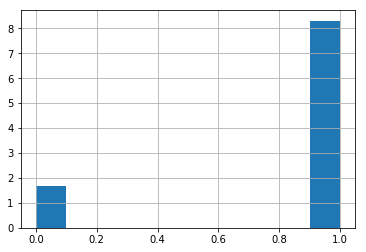

In [9]:
e2014.IN_NOTURNO.hist(bins=10, normed=True)

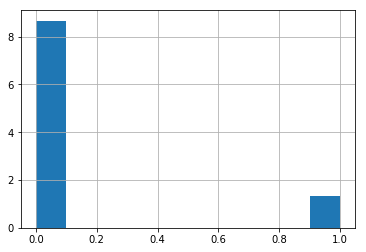

In [10]:
e2014.IN_VESPER.hist(bins=10,normed=True)

Existem mais gente estudando a tarde


<div class="alert alert-info">
<b>5</b> - Em geral, o MEC acredita que não há importantes diferenças de desepenho entre alunos quotistas e não quotistas. Este é o caso para o curso de Ciência da Computação (CO_GRUPO = 4004), considerando as distribuições de notas dos dois grupos? _Dica_: não são quotistas os alunos que responderam A à pergunta QE_I15.
</div>

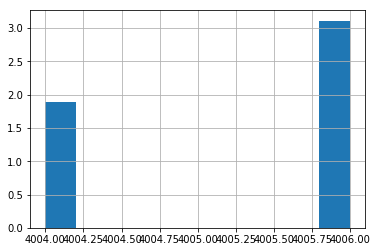

In [22]:
e2014.CO_GRUPO.hist(bins=10,normed=True)

<div class="alert alert-info">
<b>6</b> - Como se comparam os desempenhos dos alunos de instituíções públicas, privadas sem fim lucrativo e privadas com fim lucrativo?
</div>

#### Cruzando dados

Os motivos elencados para descrever o que leva um candidato a escolher seu curso de computação (QE_I25) incluem:

A = Inserção no mercado de trabalho.<br>B = Influência familiar.<br>C = Valorização profissional.<br>D = Prestígio Social.<br>E = Vocação.<br>F = Oferecimento do curso na modalidade a distância.<br>G = Baixa concorrência para ingresso.<br>H = Outro motivo. 

<div class="alert alert-info">
<b>7</b> - Cruze a informação sobre o curso do aluno (CO_GRUPO) com a resposta dada a esta pergunta (QE_I25), de forma a obter, para os motivos A, C, E e H, o percentual de alunos que os escolheram, de acordo com os cursos realizados.
</div>

In [38]:

e2014[e2014['QE_I25']=='A'].head()

,ANO_FIM_2G,ANO_IN_GRAD,CO_CATEGAD,CO_GRUPO,CO_IES,CO_ORGACAD,CO_REGIAO_CURSO,CO_RS_I1,CO_RS_I2,CO_RS_I3,...,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,TP_SEXO
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,...,6.0,6.0,6.0,6.0,3.0,1.0,6.0,6.0,6.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,D,C,...,5.0,6.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,E,D,...,5.0,5.0,5.0,5.0,5.0,3.0,4.0,3.0,5.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,...,2.0,2.0,1.0,2.0,4.0,8.0,2.0,1.0,2.0,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,D,...,2.0,3.0,2.0,2.0,3.0,1.0,2.0,3.0,1.0,NaN


Considerando as seguintes faixas de renda (QE_I08):

A = Até 1,5 salário mínimo (até R\$ 1.086,00).<br>B = De 1,5 a 3 salários mínimos (R\$ 1.086,01 a R\$ 2.172,00).<br>C = De 3 a 4,5 salários mínimos (R\$ 2.172,01 a R\$ 3.258,00).<br>D = De 4,5 a 6 salários mínimos (R\$ 3.258,01 a R\$ 4.344,00).<br>E = De 6 a 10 salários mínimos (R\$ 4.344,01 a R\$ 7.240,00).<br>F = De 10 a 30 salários mínimos (R\$ 7.240,01 a R\$ 21.720,00).<br>G = Acima de 30 salários mínimos (mais de R\$ 21.720,01).

<div class="alert alert-info">
<b>8</b> - É verdade que, quando comparado às instituíções privadas, estão nos cursos de computação das universidades federais tanto os estudantes mais pobres quanto os mais ricos do país?
</div>

#### Obtendo valor consolidado sobre dados cruzados (pivô)

Considerando como foi o ensino médio dos alunos, de acordo com as opções em QE_I17:

A = Todo em escola pública.<br>B = Todo em escola privada (particular).<br>C = Todo no exterior.<br>D = A maior parte em escola pública.<br>E = A maior parte em escola privada (particular).<br>F = Parte no Brasil e parte no exterior.

<div class="alert alert-info">
<b>9</b> - Qual a nota geral média dos alunos, de acordo com a forma como ele cursou ensino médio?
</div>

Dadas as regiões do país de acordo com CO_REGIAO_CURSO:

1 = Norte<br>2 = Nordeste<br>3 = Sudeste<br>4 = Sul<br>5 = Centro-Oeste

<div class="alert alert-info">
<b>10</b> - Qual a nota geral média dos alunos, de acordo com sua renda, por região?
</div>

#### Agrupando e ordenando dados

<div class="alert alert-info">
<b>11</b> - Qual o ranking dos estados de acordo com a nota média obtida por alunos de Ciência da Computação (curso 4004), considerando apenas instituições públicas?
</div>

#### Comportamentos anômalos

<div class="alert alert-info">
<b>12</b> - A idade do aluno é caracterizada por anomalias em sua distribuição?
</div>

#### Engenharia de atributos

As questões QE_I27 a QE_I68 nos permitem avaliar quão boa é a instituição de acordo com a visão dos estudantes. Ela deve ser calculada como:

NT_INST = $\frac{1}{N} \sum_{i=27}^{68} \frac{f(\text{QE_I}_i) - 1}{5}$

onde $f$ é uma função que retorna o valor de QE_I$_i$ se ele estiver entre 1 a 6; ela retorna 1, caso contrário. $N$ é o total de questões, entre QE_I27 a QE_I68, que tiveram nota entre 1 a 6.

<div class="alert alert-info">
<b>13</b> - Seguindo a definição dada, crie a coluna NT_INST que reflete a nota que cada estudante daria para a instituição. 
</div>    

#### Preparando dados para classificação

Queremos tentar prever a nota de um aluno apartir das seguintes informações:

* CO_CATEGAD, CO_ORGACAD, CO_UF_CURSO, CO_GRUPO (binário) 
* NU_IDADE, TP_SEXO (binário), IN_MATUT (binário), IN_VESPER (binário), IN_NOTURNO (binário) 
* QE_I01, QE_I02, QE_I03, QE_I04, QE_I05, QE_I06, QE_I07, QE_I08, QE_I09, QE_I10, QE_I11, QE_I12, QE_I13, QE_I14, QE_I15, QE_I17, QE_I18, QE_I19, QE_I20, QE_I21, QE_I22, QE_I23, QE_I24, QE_I25, QE_I26 
* NT_INST

<div class="alert alert-info">
<b>14</b> - Prepare os dados para aprendizado, convertendo strings (CO_UF_CURSO e TP_SEXO) para dados categóricos, dados categóricos não binários para hot-vectors e padronizando dados numéricos usando Z-score.
</div> 

## Questão bônus 
### Classificação

Se você gerou os dados corretamente, você pode agora tentar prever, dado um aluno, se ele vai passar ou não no ENADE:

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [0]:
Y = e2014.NT_GER.apply(lambda v: 0 if v < 50 else 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.10)

In [0]:
clf = RandomForestClassifier(n_estimators = 300, max_depth=5, random_state=0)

In [0]:
clf.fit(X_train, y_train)

In [0]:
clf.score(X_test, y_test) 

In [0]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

In [0]:
attrs = list(X.columns.values)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    if importances[indices[f]] > 0:
        print("%d. %f -- %s" % (f + 1, importances[indices[f]], attrs[indices[f]]))

<div class="alert alert-info">
<b>15</b> - Que atributos a RandomForest julgou mais relevantes para determinar se o aluno vai ou não passar?
</div>

## ANEXO: Dicionário de Dados

## Informações Gerais

**Dados da IES**

| **Coluna** | **Descrição** | **Valores** |
|--:|:--|:--|
| CO_IES | Código da IES (e-Mec) |  |
| CO_CATEGAD | Código da categoria administrativa da IES | 10002 = Pessoa Jurídica de Direito Público - Federal<br>10005 = Privada com fins lucrativos<br>10008 = Privada sem fins lucrativos |
| CO_ORGACAD | Código da organização acadêmica da IES | 10020 = Centro Universitário<br>10022 = Faculdade<br>10026 = Instituto Federal de Educação, Ciência e Tecnologia<br>10028 = Universidade |
| CO_GRUPO | Código da área de enquadramento do curso no Enade | 4004 = CIÊNCIA DA COMPUTAÇÃO (BACHARELADO)<br> 4006 = SISTEMAS DE INFORMAÇÃO |
| CO_UF_CURSO | Código da UF de funcionamento do curso | SP MG RS RJ SC PR PE DF BA CE GO AM PA PB MA ES MT PI MS AL RO TO SE RN AC RR AP | 
| CO_REGIAO_CURSO | Código da região de funcionamento do curso | 1 = Norte<br>2 = Nordeste<br>3 = Sudeste<br>4 = Sul<br>5 = Centro-Oeste |

**Dados dos Participantes**

| **Coluna** | **Descrição** | **Valores** |
|--:|:--|:--|
| NU_IDADE | Idade do inscrito em 23/11/2014 |  |
| TP_SEXO | Sexo | M = Masculino <br>F = Feminino |
| ANO_FIM_2G | Ano de conclusão do Ensino Médio |  |
| ANO_IN_GRAD | Ano de início da graduação |  |
| IN_MATUT | Indicador de turno matutino | 0 = Não <br>1 = Sim |
| IN_VESPER | Indicador de turno vespertino | 0 = Não <br>1 = Sim |
| IN_NOTURNO | Indicador de turno noturno | 0 = Não <br>1 = Sim |


**Notas dos Participantes**

| **Coluna** | **Descrição** |
|--:|:--|
| NT_GER | Nota bruta da prova - Média ponderada da formação geral (25%) e componente específico (75%). (valor de 0 a 100) |
| NT_FG | Nota bruta na formação geral - Média ponderada da parte objetiva (60%) e discursiva (40%) na formação geral.(valor de 0 a 100) |
| NT_OBJ_FG | Nota bruta na parte objetiva da formação geral. (valor de 0 a 100) |
| NT_DIS_FG | Nota bruta na parte discursiva da formação geral. (valor de 0 a 100) |
| NT_FG_D1 | Nota da questão 1 da parte discursiva da formação geral - Média ponderada da parte de Língua Portuguesa (20%) e Conteúdo (80%) da Questão 1 da parte discursiva. (valor de 0 a 100) |
| NT_FG_D1_PT | Nota de Língua Portuguesa da questão 1 da parte discursiva da formação geral. (valor de 0 a 100) |
| NT_FG_D1_CT | Nota de Conteúdo da questão 1 da parte discursiva da formação geral. (valor de 0 a 100)  |
| NT_FG_D2 | Nota da questão 2 da parte discursiva na formação geral - Média ponderada da parte de Língua Portuguesa (20%) e Conteúdo (80%) da Questão 2 da parte discursiva. (valor de 0 a 100) |
| NT_FG_D2_PT | Nota de Língua Portuguesa da questão 2 da parte discursiva da formação geral.(valor de 0 a 100)  |
| NT_FG_D2_CT | Nota de Conteúdo da questão 2 da parte discursiva da formação geral. (valor de 0 a 100)  |
| NT_CE | Nota bruta no componente específico - Média ponderada da parte objetiva (85%) e discursiva (15%) no componente específico. (valor de 0 a 100) |
| NT_OBJ_CE | Nota bruta na parte objetiva do componente específico. (valor de 0 a 100)  |
| NT_DIS_CE | Nota bruta na parte discursiva do componente específico. (valor de 0 a 100) |
| NT_CE_D1 | Nota da questão 1 da parte discursiva do componente específico. (valor de 0 a 100)  |
| NT_CE_D2 | Nota da questão 2 da parte discursiva do componente específico. (valor de 0 a 100)  |
| NT_CE_D3 | Nota da questão 3 da parte discursiva do componente específico. (valor de 0 a 100)  |

## Respostas aos Questionários

**Questionário sobre a prova**

| **Coluna** | **Descrição** | **Valores** |
|--:|:--|:--|
| CO_RS_I1 | 1 - Qual o grau de dificuldade desta prova na parte de Formação Geral? | A = Muito fácil.<br>B = Fácil.<br>C = Médio.<br>D = Difícil.<br>E = Muito difícil.<br>* = Resposta anulada<br>. = Não respondeu |
| CO_RS_I2 | 2 - Qual o grau de dificuldade desta prova na parte do Componente Específico? | A = Muito fácil.<br>B = Fácil.<br>C = Médio.<br>D = Difícil.<br>E = Muito difícil.<br>* = Resposta anulada<br>. = Não respondeu |
| CO_RS_I3 | 3 - Considerando a extensão da prova, em relação ao tempo total, você considera que a prova foi: | A = Muito longa.<br>B = Longa.<br>C = Adequada.<br>D = Curta.<br>E = Muito curta.<br>* = Resposta anulada<br>. = Não respondeu |
| CO_RS_I4 | 4 - Os enunciados das questões da prova na parte de Formação Geral estavam claros e objetivos? | A = Muito fácil.<br>B = Fácil.<br>C = Médio.<br>D = Difícil.<br>E = Muito difícil.<br>* = Resposta anulada<br>. = Não respondeu |
| CO_RS_I5 | 5 - Os enunciados das questões na parte do Componente Específico estavam claros e objetivos? | A = Muito fácil.<br>B = Fácil.<br>C = Médio.<br>D = Difícil.<br>E = Muito difícil.<br>* = Resposta anulada<br>. = Não respondeu |
| CO_RS_I6 | 6 - As informações/instruções fornecidas para a resolução das questões foram suficientes para resolvê-las? | A = Sim, até excessivas.<br>B = Sim, em todas elas.<br>C = Sim, na maioria delas.<br>D = Sim, somente em algumas.<br>E = Não, em nenhuma delas.<br>* = Resposta anulada<br>. = Não respondeu |
| CO_RS_I7 | 7 - Você se deparou com alguma dificuldade ao responder à prova. Qual? | A = Desconhecimento do conteúdo.<br>B = Forma diferente de abordagem do conteúdo.<br>C = Espaço insuficiente para responder às questões.<br>D = Falta de motivação para fazer a prova.<br>E = Não tive qualquer tipo de dificuldade para responder à prova.<br>* = Resposta anulada<br>. = Não respondeu |
| CO_RS_I8 | 8 - Considerando apenas as questões objetivas da prova, você percebeu que: | A = Não estudou ainda a maioria desses conteúdos.<br>B = Estudou alguns desses conteúdos, mas não os aprendeu.<br>C = Estudou a maioria desses conteúdos, mas não os aprendeu.<br>D = Estudou e aprendeu muitos desses conteúdos.<br>E = Estudou e aprendeu todos esses conteúdos.<br>* = Resposta anulada<br>. = Não respondeu |
| CO_RS_I9 | 9 - Qual foi o tempo gasto por você para concluir a prova? | A = Menos de uma hora.<br>B = Entre uma e duas horas.<br>C = Entre duas e três horas.<br>D = Entre três e quatro horas.<br>E = Quatro horas e não consegui terminar.<br>* = Resposta anulada<br>. = Não respondeu |

**Questionário sobre o candidato**

| **Coluna** | **Descrição** | **Valores** |
|--:|:--|:--|
| QE_I01 | Qual o seu estado civil? | A = Solteiro(a).<br>B = Casado(a).<br>C = Separado(a) judicialmente/divorciado(a).<br>D = Viúvo(a).<br>E = Outro. |
| QE_I02 | Como você se considera? | A = Branco(a).<br>B = Negro(a).<br>C = Pardo(a)/mulato(a).<br>D = Amarelo(a) (de origem oriental).<br>E = Indígena ou de origem indígena. |
| QE_I03 | Qual a sua nacionalidade? | A = Brasileira.<br>B = Brasileira naturalizada.<br>C = Estrangeira. |
| QE_I04 | Até que etapa de escolarização seu pai concluiu? | A = Nenhuma.<br>B = Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série).<br>C = Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série).<br>D = Ensino Médio.<br>E = Ensino Superior - Graduação.<br>F = Pós-graduação. |
| QE_I05 | Até que etapa de escolarização sua mãe concluiu? | A = Nenhuma.<br>B = Ensino fundamental: 1º ao 5º ano (1ª a 4ª série).<br>C = Ensino fundamental: 6º ao 9º ano (5ª a 8ª série).<br>D = Ensino médio.<br>E = Ensino Superior - Graduação.<br>F = Pós-graduação. |
| QE_I06 | Onde e com quem você mora atualmente? | A = Em casa ou apartamento, sozinho.<br>B = Em casa ou apartamento, com pais e/ou parentes.<br>C = Em casa ou apartamento, com cônjuge e/ou filhos.<br>D = Em casa ou apartamento, com outras pessoas (incluindo república).<br>E = Em alojamento universitário da própria instituição.<br>F = Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro) |
| QE_I07 | Quantas pessoas da sua família moram com você? Considere seus pais, irmãos, cônjuge, filhos e outros parentes que moram na mesma casa com você. | A = Nenhuma.<br>B = Uma.<br>C = Duas.<br>D = Três.<br>E = Quatro.<br>F = Cinco.<br>G = Seis.<br>H = Sete ou mais. |
| QE_I08 | Qual a renda total de sua família, incluindo seus rendimentos? | A = Até 1,5 salário mínimo (até R\$ 1.086,00).<br>B = De 1,5 a 3 salários mínimos (R\$ 1.086,01 a R\$ 2.172,00).<br>C = De 3 a 4,5 salários mínimos (R\$ 2.172,01 a R\$ 3.258,00).<br>D = De 4,5 a 6 salários mínimos (R\$ 3.258,01 a R\$ 4.344,00).<br>E = De 6 a 10 salários mínimos (R\$ 4.344,01 a R\$ 7.240,00).<br>F = De 10 a 30 salários mínimos (R\$ 7.240,01 a R\$ 21.720,00).<br>G = Acima de 30 salários mínimos (mais de R\$ 21.720,01). |
| QE_I09 | Qual alternativa a seguir melhor descreve sua situação financeira (incluindo bolsas)? | A = Não tenho renda e meus gastos são financiados por programas governamentais.<br>B = Não tenho renda e meus gastos são financiados pela minha família ou por outras pessoas.<br>C = Tenho renda, mas recebo ajuda da família ou de outras pessoas para financiar meus gastos.<br>D = Tenho renda e não preciso de ajuda para financiar meus gastos.<br>E = Tenho renda e contribuo com o sustento da família.<br>F = Sou o principal responsável pelo sustento da família. |
| QE_I10 | Qual alternativa a seguir melhor descreve sua situação de trabalho (exceto estágio ou bolsas)? | A = Não estou trabalhando.<br>B = Trabalho eventualmente.<br>C = Trabalho até 20 horas semanais.<br>D = Trabalho de 21 a 39 horas semanais.<br>E = Trabalho 40 horas semanais ou mais. |
| QE_I11 | Que tipo de bolsa de estudos ou financiamento do curso você recebeu para custear todas ou a maior parte das mensalidades? No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração. | A = Nenhum, pois meu curso é gratuito.<br>B = Nenhum, embora meu curso não seja gratuito.<br>C = ProUni integral.<br>D = ProUni parcial, apenas.<br>E = FIES, apenas.<br>F = ProUni Parcial e FIES.<br>G = Bolsa oferecida por governo estadual, distrital ou municipal.<br>H = Bolsa oferecida pela própria instituição.<br>I = Bolsa oferecida por outra entidade (empresa, ONG, outra).<br>J = Financiamento oferecido pela própria instituição.<br>K = Financiamento bancário. |
| QE_I12 | Ao longo da sua trajetória acadêmica, você recebeu algum tipo de auxílio permanência? No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração. | A = Nenhum.<br>B = Auxílio moradia.<br>C = Auxílio alimentação.<br>D = Auxílio moradia e alimentação.<br>E = Auxílio permanência.<br>F = Outro tipo de auxílio. |
| QE_I13 | Ao longo da sua trajetória acadêmica, você recebeu algum tipo de bolsa acadêmica? No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração. | A = Nenhum.<br>B = Bolsa de iniciação científica.<br>C = Bolsa de extensão.<br>D = Bolsa de monitoria/tutoria.<br>E = Bolsa PET.<br>F = Outro tipo de bolsa acadêmica. |
| QE_I14 | Durante o curso de graduação você participou de programas e/ou atividades curriculares no exterior? | A = Não participei.<br>B = Sim, Programa Ciência sem Fronteiras.<br>C = Sim, programa de intercâmbio financiado pelo Governo Federal (Marca; Brafitec; PLI; outro).<br>D = Sim, programa de intercâmbio financiado pelo Governo Estadual.<br>E = Sim, programa de intercâmbio da minha instituição.<br>F = Sim, outro intercâmbio não institucional. |
| QE_I15 | Seu ingresso no curso de graduação se deu por meio de políticas de ação afirmativa ou inclusão social? | A = Não.<br>B = Sim, por critério étnico-racial.<br>C = Sim, por critério de renda.<br>D = Sim, por ter estudado em escola pública ou particular com bolsa de estudos.<br>E = Sim, por sistema que combina dois ou mais critérios anteriores.<br>F = Sim, por sistema diferente dos anteriores. |
| QE_I17 | Em que tipo de escola você cursou o ensino médio? | A = Todo em escola pública.<br>B = Todo em escola privada (particular).<br>C = Todo no exterior.<br>D = A maior parte em escola pública.<br>E = A maior parte em escola privada (particular).<br>F = Parte no Brasil e parte no exterior. |
| QE_I18 | Qual modalidade de ensino médio você concluiu? | A = Ensino médio tradicional.<br>B = Profissionalizante técnico (eletrônica, contabilidade, agrícola, outro).<br>C = Profissionalizante magistério (Curso Normal).<br>D = Educação de Jovens e Adultos (EJA) e/ou Supletivo.<br>E = Outra modalidade. |
| QE_I19 | Quem lhe deu maior incentivo para cursar a graduação? | A = Ninguém.<br>B = Pais.<br>C = Outros membros da família que não os pais.<br>D = Professores.<br>E = Líder ou representante religioso.<br>F = Colegas/Amigos.<br>G = Outras pessoas. |
| QE_I20 | Algum dos grupos abaixo foi determinante para você enfrentar dificuldades durante seu curso superior e concluí-lo? | A = Não tive dificuldade.<br>B = Não recebi apoio para enfrentar dificuldades.<br>C = Pais.<br>D = Avós.<br>E = Irmãos, primos ou tios.<br>F = Líder ou representante religioso.<br>G = Colegas de curso ou amigos.<br>H = Professores do curso.<br>I = Profissionais do serviço de apoio ao estudante da IES.<br>J = Colegas de trabalho.<br>K = Outro grupo. |
| QE_I21 | Alguém em sua família concluiu um curso superior? | A = Sim.<br>B = Não. |
| QE_I22 | Excetuando-se os livros indicados na bibliografia do seu curso, quantos livros você leu neste ano? |A = Nenhum.<br>B = Um ou dois.<br>C = De três a cinco.<br>D = De seis a oito.<br>E = Mais de oito. |
| QE_I23 | Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula? | A = Nenhuma, apenas assisto às aulas.<br>B = De uma a três.<br>C = De quatro a sete.<br>D = De oito a doze.<br>E = Mais de doze. |
| QE_I24 | Você teve oportunidade de aprendizado de idioma estrangeiro na Instituição? | A = Sim, somente na modalidade presencial.<br>B = Sim, somente na modalidade semipresencial.<br>C = Sim, parte na modalidade presencial e parte na modalidade semipresencial.<br>D = Sim, na modalidade a distância.<br>E = Não. |
| QE_I25 | Qual o principal motivo para você ter escolhido este curso? | A = Inserção no mercado de trabalho.<br>B = Influência familiar.<br>C = Valorização profissional.<br>D = Prestígio Social.<br>E = Vocação.<br>F = Oferecido na modalidade a distância.<br>G = Baixa concorrência para ingresso.<br>H = Outro motivo. |
| QE_I26 | Qual a principal razão para você ter escolhido a sua instituição de educação superior? | A = Gratuidade.<br>B = Preço da mensalidade.<br>C = Proximidade da minha residência.<br>D = Proximidade do meu trabalho.<br>E = Facilidade de acesso.<br>F = Qualidade/reputação.<br>G = Foi a única onde tive aprovação.<br>H = Possibilidade de ter bolsa de estudo.<br>I = Outro motivo. |

**Questionário sobre o curso**

| **Coluna** | **Descrição** | **Valores** |
|--:|:--|:--|
| QE_I27 | As disciplinas cursadas contribuíram para sua formação integral, como cidadão e profissional. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I28 | Os conteúdos abordados nas disciplinas do curso favoreceram sua atuação em estágios ou em atividades de iniciação profissional. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I29 | As metodologias de ensino utilizadas no curso desafiaram você a aprofundar conhecimentos e desenvolver competências reflexivas e críticas. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I30 | O curso propiciou experiências de aprendizagem inovadoras. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I31 | O curso contribuiu para o desenvolvimento da sua consciência ética para o exercício profissional. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I32 | No curso você teve oportunidade de aprender a trabalhar em equipe. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I33 | O curso possibilitou aumentar sua capacidade de reflexão e argumentação. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I34 | O curso promoveu o desenvolvimento da sua capacidade de pensar criticamente, analisar e refletir sobre soluções para problemas da sociedade. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I35 | O curso contribuiu para você ampliar sua capacidade de comunicação nas formas oral e escrita. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I36 | O curso contribuiu para o desenvolvimento da sua capacidade de aprender e atualizar-se permanentemente. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I37 | As relações professor-aluno ao longo do curso estimularam você a estudar e aprender. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I38 | Os planos de ensino apresentados pelos professores contribuíram para o desenvolvimento das atividades acadêmicas e para seus estudos. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I39 | As referências bibliográficas indicadas pelos professores nos planos de ensino contribuíram para seus estudos e aprendizagens. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I40 | Foram oferecidas oportunidades para os estudantes superarem dificuldades relacionadas ao processo de formação. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I41 | A coordenação do curso esteve disponível para orientação acadêmica dos estudantes. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I42 | O curso exigiu de você organização e dedicação frequente aos estudos. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I43 | Foram oferecidas oportunidades para os estudantes participarem de programas, projetos ou atividades de extensão universitária. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I44 | Foram oferecidas oportunidades para os estudantes participarem de projetos de iniciação científica e de atividades que estimularam a investigação acadêmica. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I45 | O curso ofereceu condições para os estudantes participarem de eventos internos e/ou externos à instituição. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I46 | A instituição ofereceu oportunidades para os estudantes atuarem como representantes em órgãos colegiados. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I47 | O curso favoreceu a articulação do conhecimento teórico com atividades práticas. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I48 | As atividades práticas foram suficientes para relacionar os conteúdos do curso com a prática, contribuindo para sua formação profissional. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I49 | O curso propiciou acesso a conhecimentos atualizados e/ou contemporâneos em sua área de formação. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I50 | O estágio supervisionado proporcionou experiências diversificadas para a sua formação. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I51 | As atividades realizadas durante seu trabalho de conclusão de curso contribuíram para qualificar sua formação profissional | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I52 | Foram oferecidas oportunidades para os estudantes realizarem intercâmbios e/ou estágios no país. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I53 | Foram oferecidas oportunidades para os estudantes realizarem intercâmbios e/ou estágios fora do país. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I54 | Os estudantes participaram de avaliações periódicas do curso (disciplinas, atuação dos professores, infraestrutura). | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I55 | As avaliações da aprendizagem realizadas durante o curso foram compatíveis com os conteúdos ou temas trabalhados pelos professores. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I56 | Os professores apresentaram disponibilidade para atender os estudantes fora do horário das aulas. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I57 | Os professores demonstraram domínio dos conteúdos abordados nas disciplinas. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I58 | Os professores utilizaram tecnologias da informação e comunicação (TICs) como estratégia de ensino (projetor multimídia, laboratório de informática, ambiente virtual de aprendizagem). | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I59 | A instituição dispôs de quantidade suficiente de funcionários para o apoio administrativo e acadêmico. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I60 | O curso disponibilizou monitores ou tutores para auxiliar os estudantes. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I61 | As condições de infraestrutura das salas de aula foram adequadas. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I62 | Os equipamentos e materiais disponíveis para as aulas práticas foram adequados para a quantidade de estudantes. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I63 | Os ambientes e equipamentos destinados às aulas práticas foram adequados ao curso. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I64 | A biblioteca dispôs das referências bibliográficas que os estudantes necessitaram. |1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I65 | A instituição contou com biblioteca virtual ou conferiu acesso a obras disponíveis em acervos virtuais. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I66 | As atividades acadêmicas desenvolvidas dentro e fora da sala de aula possibilitaram reflexão, convivência e respeito à diversidade. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I67 | A instituição promoveu atividades de cultura, de lazer e de interação social. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |
| QE_I68 | A instituição dispôs de refeitório, cantina e banheiros em condições adequadas que atenderam as necessidades dos seus usuários. | 1 = Discordo Totalmente a 6 = Concordo Totalmente<br>7 = Não sei responder.<br>8 = Não se aplica. |